# FGS Commissioning Tool WFR Testing

This template will walk through the tools for testing ITM images in the lead up to the March 2018 WFR. 

Note: *For a more detailed walkthrough of these tools, see the FGS Commissioning Tools Tutorial notebook.*

In [1]:
import os
from glob import glob

import matplotlib
if matplotlib.get_backend() != 'Qt5Agg':
    matplotlib.use('Qt5Agg')  # Make sure that we are using Qt5
from astropy.io import fits
from astropy.io import ascii as asc
import numpy as np
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
% matplotlib inline

# Establish paths
current_dir = os.getcwd()
package_dir = os.path.split(current_dir)[0]
data_dir = '/itar/jwst/tel/ITM Simulations/'

In [2]:
from jwst_fgs_commissioning_tools import run_fgs_commissioning_tool

/Users/kbrooks/miniconda2/envs/astroconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/Users/kbrooks/miniconda2/envs/astroconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


### Tutorial Table of Contents:
* [Run through tools](#comm_tools)
     * [Image 1](#imarr1_image1)
     * [Image 2](#imarr1_image2)
* Segment guiding
* Re-writing PRC files 
    
***

<font color='3297F0'>**IMPORTANT**</font>

For the following steps set the **`global alignment`** flag to **True**:

* Image Array
* Global Alignment

***

<a id='comm_tools'></a>
## Commissioning step: Image Array 1

<a id='imarr1_image1'></a>
### Image Name: `Melendez/Image Array 1/jw00172_005_001_01100_00000_NRCA3_img.fits`

<font color='ED9E33'>**WARNING:**</font> The following two cells need to be updated

In [3]:
# Path to data (from `data_dir`)
data_name = 'Melendez/Image Array 1/jw00172_005_001_01100_00000_NRCA3_img.fits' 
# Name of the out directory - group name
outdir_name = 'imarr1'
# If there is a directory under the group, use this to add another variable to your outname
sequence = 'seq01_' 
# The prefex to the fileout name - will be followed by input image name
outname_prefix = '{}_{}MM'.format(outdir_name, sequence)

In [4]:
NC = True
nircam_mod = None # default
fgs_counts = None # default
jmag = None # default
GA = True # default
bkgd_stars = False # default
in_file = None # default

In [12]:
input_image = os.path.join(data_dir, data_name)
guider = 1
root = '{}_{}'.format(outname_prefix, data_name.split('/')[-1].split('.')[0])
out_dir = '/itar/csa/wit/fgs/fgses/WFRTests/feb2018/{}'.format(outdir_name)

**Note:**
When running the GUI in Jupyter Notebooks, sometimes the notebook doesn't wait for user input from the GUI, and as a result, the following function call will fail. If this happens, just call the line again. Do not despair - this never happens when running the tool in IPython! (See [here](#ipython) for brief instructions on how to use the tools in IPython)

In [6]:
run_fgs_commissioning_tool.run_all(input_image, guider, root=root, nircam=NC, out_dir=out_dir,
                                  fgs_counts=fgs_counts, jmag=jmag, global_alignment=GA, bkgd_stars=bkgd_stars, 
                                  in_file=in_file)
                               

2018-02-22 15:16:07,064 INFO     Started logging to /Users/kbrooks/git_repos/tools/fgs-commissioning/logs/2018_02_22_Thu_151607_run_all_imarr1_seq01_MM_jw00172_005_001_01100_00000_NRCA3_img.log
2018-02-22 15:16:07,065 INFO     Package directory: /Users/kbrooks/git_repos/tools/fgs-commissioning/jwst_fgs_commissioning_tools
2018-02-22 15:16:07,066 INFO     Processing request for imarr1_seq01_MM_jw00172_005_001_01100_00000_NRCA3_img. 
All data will be saved in: /itar/csa/wit/fgs/fgses/WFRTests/feb2018/imarr1/out/imarr1_seq01_MM_jw00172_005_001_01100_00000_NRCA3_img
2018-02-22 15:16:07,067 INFO     Input image: /itar/jwst/tel/ITM Simulations/Melendez/Image Array 1/jw00172_005_001_01100_00000_NRCA3_img.fits
2018-02-22 15:16:07,071 WARNING  Image Conversion: No counts or J magnitude given, setting to default
2018-02-22 15:16:07,072 INFO     Image Conversion: J magnitude = 11.0
2018-02-22 15:16:07,073 INFO     Image Conversion: Beginning image conversion to guider 1 FGS image
2018-02-22 15:16

Successfully wrote: /itar/csa/wit/fgs/fgses/WFRTests/feb2018/imarr1/out/imarr1_seq01_MM_jw00172_005_001_01100_00000_NRCA3_img/stsci/imarr1_seq01_MM_jw00172_005_001_01100_00000_NRCA3_img_G1_TRKbias.fits
Successfully wrote: /itar/csa/wit/fgs/fgses/WFRTests/feb2018/imarr1/out/imarr1_seq01_MM_jw00172_005_001_01100_00000_NRCA3_img/dhas/imarr1_seq01_MM_jw00172_005_001_01100_00000_NRCA3_img_G1_TRK.fits
Successfully wrote: /itar/csa/wit/fgs/fgses/WFRTests/feb2018/imarr1/out/imarr1_seq01_MM_jw00172_005_001_01100_00000_NRCA3_img/ground_system/imarr1_seq01_MM_jw00172_005_001_01100_00000_NRCA3_img_G1_TRK.dat
2018-02-22 15:18:25,596 INFO     FSW File Writing: Max of input image: 5022
2018-02-22 15:18:25,596 INFO     FSW File Writing: Using /itar/csa/wit/fgs/fgses/WFRTests/feb2018/imarr1/out/imarr1_seq01_MM_jw00172_005_001_01100_00000_NRCA3_img/imarr1_seq01_MM_jw00172_005_001_01100_00000_NRCA3_img_G1_regfile.txt as the reg file
Successfully wrote: /itar/csa/wit/fgs/fgses/WFRTests/feb2018/imarr1/out/

### Inspect Output

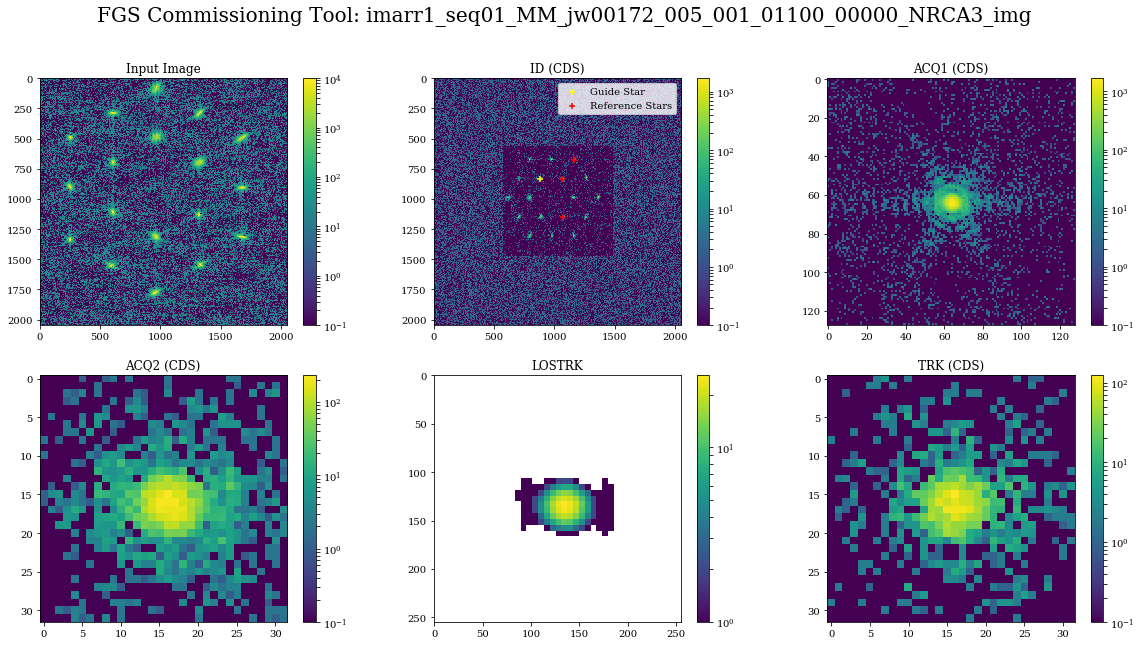

In [40]:
out_file_dir = os.path.join(out_dir, 'out', root)

# View the final FGS images
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('FGS Commissioning Tool: {}'.format(root), fontsize=20)

in_data = fits.getdata(input_image)
in_data[in_data <= 0] = 0.1
implot = ax1.imshow(in_data, norm=LogNorm(), clim=(1e-1, 1e4))
plt.colorbar(implot, ax=ax1)
ax1.set_title('Input Image')

id_data = fits.getdata(glob(os.path.join(out_file_dir, 'stsci', '*IDcds.fits'))[0])[0]
id_data[id_data <= 0] = 0.1
implot = ax2.imshow(id_data, norm=LogNorm())
plt.colorbar(implot, ax=ax2)
regfile = glob(out_file_dir + '/*regfile.txt')[0]
coords = asc.read(regfile)
ax2.scatter(coords['x'][0], coords['y'][0], marker = '+', c= 'yellow', label='Guide Star')
ax2.scatter(coords['x'][1:], coords['y'][1:], marker = '+', c= 'r', label='Reference Stars')
ax2.legend()
ax2.set_title('ID (CDS)')

acq1_data = fits.getdata(glob(os.path.join(out_file_dir, 'stsci', '*ACQ1cds.fits'))[0])[0]
acq1_data[acq1_data <= 0] = 0.1
implot = ax3.imshow(acq1_data, norm=LogNorm())
plt.colorbar(implot, ax=ax3)
ax3.set_title('ACQ1 (CDS)')

acq2_data = fits.getdata(glob(os.path.join(out_file_dir, 'stsci', '*ACQ2cds.fits'))[0])[0]
acq2_data[acq2_data <= 0] = 0.1
implot = ax4.imshow(acq2_data, norm=LogNorm())
plt.colorbar(implot, ax=ax4)
ax4.set_title('ACQ2 (CDS)')

lostrk_data = fits.getdata(glob(os.path.join(out_file_dir, 'dhas', '*LOSTRK.fits'))[0])
implot = ax5.imshow(lostrk_data, norm=LogNorm())
plt.colorbar(implot, ax=ax5)
ax5.set_title('LOSTRK')

trk_data = fits.getdata(glob(os.path.join(out_file_dir, 'dhas' ,'*_TRK.fits'))[0]).astype(float)
trk_data_cds = trk_data[1] - trk_data[0]
trk_data_cds[trk_data_cds <= 0] = 0.1
implot = ax6.imshow(trk_data_cds, norm=LogNorm())
plt.colorbar(implot, ax=ax6)
ax6.set_title('TRK (CDS)')

plt.show()

***

<a id='imarr1_image2'></a>
### Image Name: ``